# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#obeservations
#1.latitude and humidity does not seem to have a relationship with cloudiness. This is true for both hemispheres
#2. Temperature is stronly correlated with latitude. the close we get to latitude =0 (equator), the higher the temperature
#3. Wind speed is somewhat related to latitude. it increases slightly as the latitude moves away from equator.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#create an empty list to store API Data
City_Name = []
Lat = []
Lng = []
Max_temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

# Start the log counter 
Number_counter=0
Set_counter=1



print("Beginning Data Retrieval")
print("-------------------------------")

#loop through cities to add to list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        City_Name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Record = response["name"]
        if Number_counter==50:
            Number_counter=0
            Set_counter+=1
        Number_counter+=1
            
        print(f"Processing Record {Number_counter} of set {Set_counter} | {Record}")
    
        time.sleep(1.00)
    

    # If no record found go to the next one
    except:
        print("City not found. Skipping...")
    continue
    
print("-------------------------------")
print("Data Retrival Complete")



Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Roseburg
Processing Record 2 of set 1 | Souillac
City not found. Skipping...
Processing Record 3 of set 1 | Peña
Processing Record 4 of set 1 | Havre-St-Pierre
Processing Record 5 of set 1 | Bengkulu
Processing Record 6 of set 1 | Atuona
Processing Record 7 of set 1 | Srednekolymsk
Processing Record 8 of set 1 | Punta Arenas
Processing Record 9 of set 1 | New Norfolk
Processing Record 10 of set 1 | Hithadhoo
Processing Record 11 of set 1 | Qaanaaq
Processing Record 12 of set 1 | Mar del Plata
City not found. Skipping...
Processing Record 13 of set 1 | Saint-Louis
Processing Record 14 of set 1 | Ushuaia
Processing Record 15 of set 1 | Dikson
Processing Record 16 of set 1 | Busselton
Processing Record 17 of set 1 | Inuvik
Processing Record 18 of set 1 | Leshukonskoye
Processing Record 19 of set 1 | East London
Processing Record 20 of set 1 | Rikitea
Processing Record 21 of set 1 | Bredasdorp
Processin

Processing Record 37 of set 4 | Gaza
Processing Record 38 of set 4 | Ossora
Processing Record 39 of set 4 | Yermekeyevo
Processing Record 40 of set 4 | Khatanga
Processing Record 41 of set 4 | Chui
Processing Record 42 of set 4 | Birao
Processing Record 43 of set 4 | Catalina
Processing Record 44 of set 4 | Porto-Novo
Processing Record 45 of set 4 | Borogontsy
Processing Record 46 of set 4 | Qaqortoq
Processing Record 47 of set 4 | Kaitangata
Processing Record 48 of set 4 | Huarmey
Processing Record 49 of set 4 | Nyköping
Processing Record 50 of set 4 | Muyezerskiy
Processing Record 1 of set 5 | Bam
Processing Record 2 of set 5 | Moussoro
Processing Record 3 of set 5 | Kruisfontein
Processing Record 4 of set 5 | Ketchikan
Processing Record 5 of set 5 | Ust-Nera
Processing Record 6 of set 5 | Yatou
Processing Record 7 of set 5 | Hobart
Processing Record 8 of set 5 | Sechura
Processing Record 9 of set 5 | Nurota
Processing Record 10 of set 5 | Carmelo
Processing Record 11 of set 5 | Poia

Processing Record 29 of set 8 | Tarakan
Processing Record 30 of set 8 | Arman'
Processing Record 31 of set 8 | Mahibadhoo
Processing Record 32 of set 8 | Piteå
Processing Record 33 of set 8 | Kavaratti
City not found. Skipping...
Processing Record 34 of set 8 | Forécariah
Processing Record 35 of set 8 | Surgut
Processing Record 36 of set 8 | Bad Salzungen
Processing Record 37 of set 8 | Matagami
Processing Record 38 of set 8 | Colchester
Processing Record 39 of set 8 | Sotik Post
Processing Record 40 of set 8 | Nantucket
City not found. Skipping...
Processing Record 41 of set 8 | Juneau
Processing Record 42 of set 8 | Westport
Processing Record 43 of set 8 | Covington
Processing Record 44 of set 8 | Nome
Processing Record 45 of set 8 | Edd
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of set 8 | Mazara del Vallo
Processing Record 47 of set 8 | Nueva Guinea
City not found. Skipping...
Processing Record 48 of set 8 | Boende
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather={"City":City_Name,
         "Lat":Lat,
         "Lng":Lng,
         "Max Temp":Max_temp,
         "Humidity":Humidity,
         "Cloudiness":Cloudiness,
         "Wind Speed":Wind_speed,
          "Country":Country,
         "Date":Date}

weather_df=pd.DataFrame(weather)
print(weather_df.count())
weather_df.head()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Roseburg,43.22,-123.34,89.60,24,1,10.29,US,1592618965
1,Souillac,-20.52,57.52,71.60,68,40,14.99,MU,1592618967
2,Peña,12.09,123.94,83.86,72,0,8.63,PH,1592618968
3,Havre-St-Pierre,50.23,-63.60,51.80,93,90,14.99,CA,1592618969
4,Bengkulu,-3.80,102.27,80.80,71,44,1.01,ID,1592618804


In [6]:
weather_df.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity =weather_df.loc[weather_df["Humidity"] > 100, :]
humidity
#no country with humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

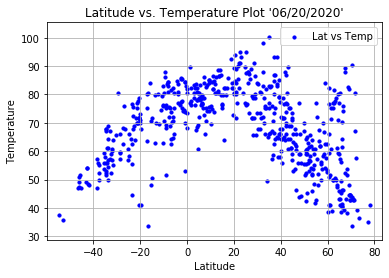

In [8]:
lattitude=weather_df["Lat"]
temperature=weather_df["Max Temp"]
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Temperature_Plot.PNG")
plt.show()

#this graph checks wether there's a relationship between latitutde the temperature.
#if there's posititve correlation, it means the higher the lattitude, the higher the max temperature of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the max temperature of the city. otherwise there's no relationship.


## Latitude vs. Humidity Plot

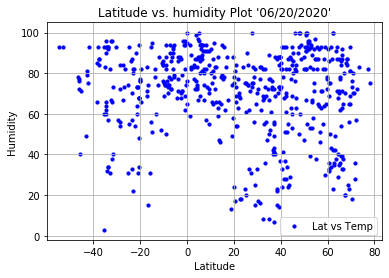

In [9]:

lattitude=weather_df["Lat"]
humidity=weather_df["Humidity"]
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. humidity Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Humidity.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the humidity
#if there's posititve correlation, it means the higher the lattitude, the higher the humidity of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the humidity of the city. otherwise there's no relationship.


## Latitude vs. Cloudiness Plot

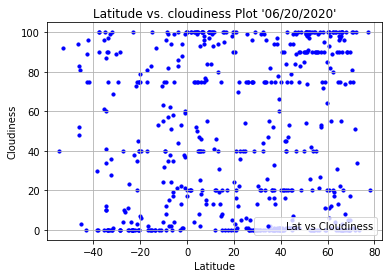

In [10]:
lattitude=weather_df["Lat"]
cloudiness=weather_df["Cloudiness"]
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Cloudiness")
plt.grid(True)
plt.title("Latitude vs. cloudiness Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Cloudiness.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the cloudiness
#if there's posititve correlation, it means the higher the lattitude, the higher the cloudiness of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the cloudiness of the city. otherwise there's no relationship.



## Latitude vs. Wind Speed Plot

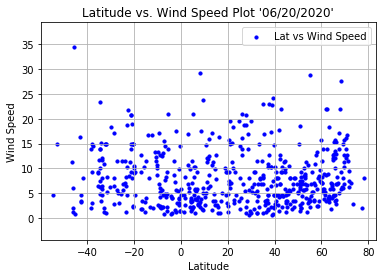

In [11]:
lattitude=weather_df["Lat"]
wind_speed=weather_df["Wind Speed"]
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Wind Speed")
plt.grid(True)
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the Wind Speed
#if there's posititve correlation, it means the higher the lattitude, the higher the Wind Speed of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the Wind Speed of the city. otherwise there's no relationship.



## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern =weather_df.loc[weather_df["Lat"]>=0,:]
Southern=weather_df.loc[weather_df["Lat"]<0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

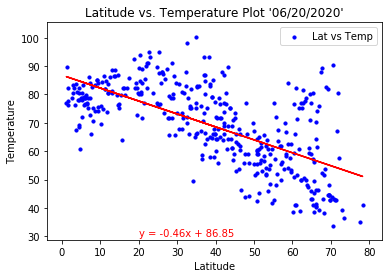

The R squared is 0.4329577253437898


In [14]:
lattitude=Northern["Lat"]
temperature=Northern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(20,30),fontsize=10,color="red")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#lattitude is correlated with Temperature. the higher the tempature the further we move away from equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

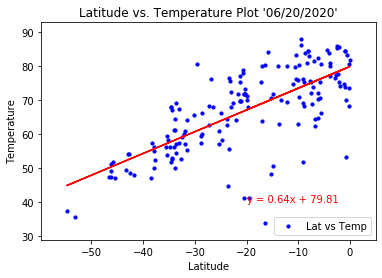

The R squared is 0.5222732465500187


In [15]:
lattitude=Southern["Lat"]
temperature=Southern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(-20,40),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#lattitude is correlated with Temperature. the higher the tempature the closer we are to equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

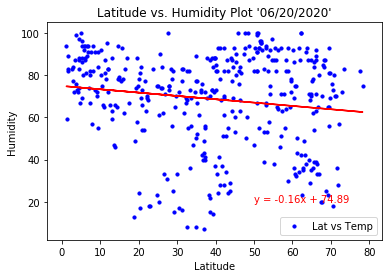

The R squared is 0.02194976821855589


In [16]:
lattitude=Northern["Lat"]
humidity=Northern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.annotate(line_equation,(50,20),fontsize=10,color="red")
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#humidity doesnt seem to be realted with latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

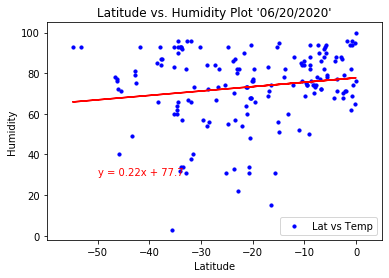

The R squared is 0.026090149649409655


In [17]:
lattitude=Southern["Lat"]
humidity=Southern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.annotate(line_equation,(-50,30),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#humidity doesnt seem to be realted with latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

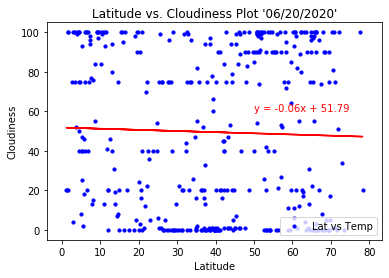

The R squared is 0.0009178634159053719


In [18]:
lattitude=Northern["Lat"]
cloudiness=Northern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#cloudiness doesn't seem to be realted with latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

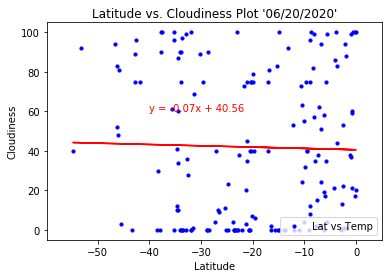

The R squared is 0.0005994580434909706


In [19]:
lattitude=Southern["Lat"]
cloudiness=Southern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(-40,60),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Weather_Output_PNG/Souththern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#cloudiness doesn't seem to be realted with latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

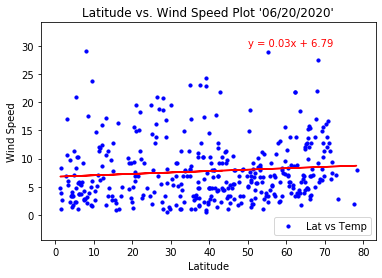

The R squared is 0.00932335860579099


In [20]:
lattitude=Northern["Lat"]
wind_speed=Northern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(50,30),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Northern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#wind speed slightly decrease as we move away from equator

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

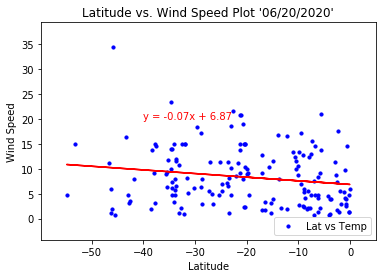

The R squared is 0.03004939508732665


In [21]:
lattitude=Southern["Lat"]
wind_speed=Southern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(-40,20),fontsize=10,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Weather_Output_PNG/Southern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")
#wind speed slightly increase as we move closer to